<a href="https://colab.research.google.com/github/anirudhjaju/Grid-Search-CV-on-Diabetes-dataset/blob/main/Data%20Extraction_Analysis%20using%20NLP%20and%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**1.Data from African Development Bank Group**

In [ ]:
df=pd.read_csv("/content/dataset1.csv")
df.rename(columns={'Project Name':'Project'},inplace=True)
df.head()


,ID,Project,Country,Status,Approval
0,P-Z1-DB0-202,MULTINATIONAL NACALA ROAD CORRIDOR DEVELOPMENT...,Multinational,Identification,19-Jun-19
1,P-LS-E00-007,CLIMATE CHANGE ADAPTATION FOR SUSTAINABLE RURA...,Lesotho,Lending,30-May-19
2,P-GA-E00-001,PROGRAMME INTÉGRÉ D'ALIMENTATION EN EAU POTABL...,Gabon,Approved,10-Jan-19
3,P-UG-EB0-007,PREPARATION OF FEASIBILITY STUDIES AND DETAILE...,Uganda,Approved,18-Dec-18
4,P-DZ-KF0-003,APPUI GOUVERNANCE ENTREPRISES PUBLIQUES ET DES...,Algeria,Approved,18-Dec-18


In [ ]:
df=df.drop(['ID'],axis=1)
df.head()

,Project,Country,Status,Approval
0,MULTINATIONAL NACALA ROAD CORRIDOR DEVELOPMENT...,Multinational,Identification,19-Jun-19
1,CLIMATE CHANGE ADAPTATION FOR SUSTAINABLE RURA...,Lesotho,Lending,30-May-19
2,PROGRAMME INTÉGRÉ D'ALIMENTATION EN EAU POTABL...,Gabon,Approved,10-Jan-19
3,PREPARATION OF FEASIBILITY STUDIES AND DETAILE...,Uganda,Approved,18-Dec-18
4,APPUI GOUVERNANCE ENTREPRISES PUBLIQUES ET DES...,Algeria,Approved,18-Dec-18


**NLP Operations**

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
tokens = nlp(''.join(str(df.Project.tolist())))
tokens

['MULTINATIONAL NACALA ROAD CORRIDOR DEVELOPMENT PROJECT PHASE V - MALAWI', 'CLIMATE CHANGE ADAPTATION FOR SUSTAINABLE RURAL WATER SUPPLY IN LOWLANDS LESOTHO', "PROGRAMME INTÉGRÉ D'ALIMENTATION EN EAU POTABLE ET ASSAINISSEMENT DE LIBREVILLE SOUS-PROGRAMME 1", 'PREPARATION OF FEASIBILITY STUDIES AND DETAILED DESIGNS FOR FAECAL SLUDGE SERVICE CHAIN MANAGEMENT', "APPUI GOUVERNANCE ENTREPRISES PUBLIQUES ET DES PARTICIPATIONS DE L'ETAT", 'NACHTIGAL HYDRO POWER PROJECT', 'ACHWA II HYDROPOWER PLANT', 'EMERGING AFRICA INFRASTRUCTURE FUND PROJECT (EAIF3)', "TCHAD-ABN PROGRAMME INTEGRE DE DEVELOPPEMENT ET D'ADAPTATION AUX CC DANS LE BASSIN DU NIGER", 'OUBANGUI RIVER BRIDGE& BANGUI-KISANGANI-BUJUMBURA& KISANGANI-KAMPALA ROADS,PHASEI CTRAL&EAST AFRICA', 'BANQUE DE DEVELOPPEMENT DU MALI BDM', 'PROJET RENFORCEMENT DE LA RÉSILIENCE POUR LA SÉCURITÉ ALIMENTAIRE P2RS - GEF', "PROGRAMME DESERT TO POWER - PROJET YELEEN D'ELECTRIFICATION RURALE", 'GSEZ PORT PROJECT', 'SAY NO TO FAMINE FOR NIGERIA', 'ADDIT

In [ ]:
for ent in tokens.ents:
  print(ent.text, "|", ent.label_)

EAU | ORG
ASSAINISSEMENT DE LIBREVILLE SOUS-PROGRAMME 1 | PERSON
TCHAD-ABN PROGRAMME | ORG
D'ADAPTATION AUX CC DANS | PERSON
LE | GPE
AFRICA | ORG
BANQUE DE DEVELOPPEMENT DU | ORG
PROJET RENFORCEMENT | ORG
FEASIBILITY STUDY OF | ORG
THE DEEP SEA PORT | LOC
FEASIBILITY STUDY OF A DEEP SEA PORT | ORG


In [ ]:
from spacy import displacy
displacy.render(tokens, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[\'MULTINATIONAL NACALA ROAD CORRIDOR DEVELOPMENT PROJECT PHASE V - MALAWI\', \'CLIMATE CHANGE ADAPTATION FOR SUSTAINABLE RURAL WATER SUPPLY IN LOWLANDS LESOTHO\', &quot;PROGRAMME INTÉGRÉ D\'ALIMENTATION EN \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    EAU\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n POTABLE ET \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    ASSAINISSEMENT DE LIBREVILLE SOUS-PROGRAMME 1\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n&quot;, \'PREPARATION OF FEASIBILITY STUDIES AND DETAILED DESIGNS FO

In [ ]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

**Visualization**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Status', ylabel='count'>

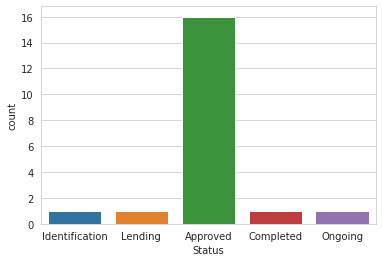

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Status",data=df)

<AxesSubplot:xlabel='Project', ylabel='Status'>

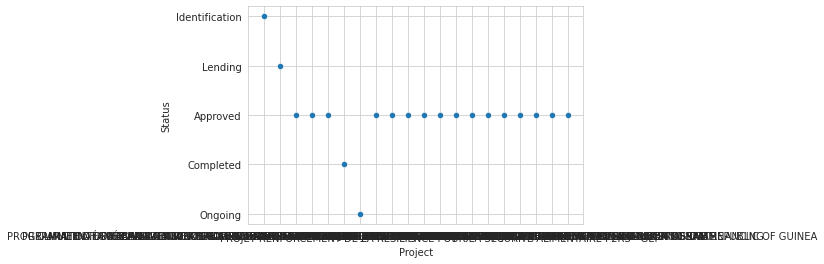

In [ ]:
sns.scatterplot(data=df,x="Project",y="Status")

<AxesSubplot:xlabel='Country', ylabel='Status'>

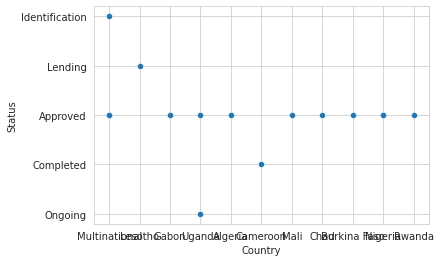

In [ ]:
sns.scatterplot(data=df,x="Country",y="Status")

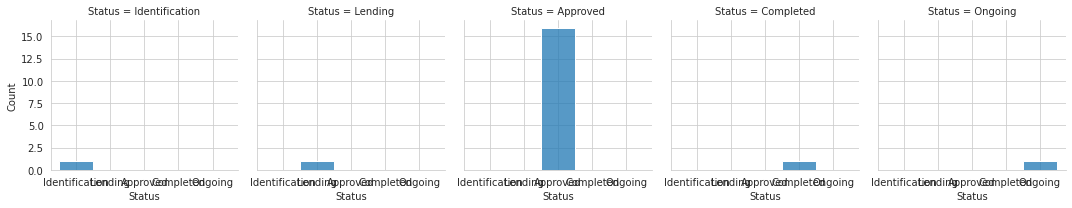

In [ ]:
g=sns.FacetGrid(df,col='Status')
g.map(sns.histplot,'Status')

<AxesSubplot:>

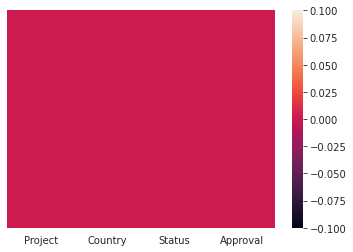

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)

**Analysis : From above graphs we can conclude that most of the projects are Approved**

*Finish......*

**2.Data from Asian Infrastructure Investment Bank**

In [ ]:
df2=pd.read_csv("/content/dataset2.csv")
df2.head()

,year,member,sector,Financing Type,Project Name,Unnamed: 5,Financial Amount,Status
0,—,Türkiye,Multi-sector,Sovereign,Türkiye: Turk Eximbank Green Infrastructure Su...,NaN,Proposed Funding: USD300 million,Proposed
1,—,Bangladesh,Multi-sector,Nonsovereign,Bangladesh: Infrastructure Development Financi...,NaN,Proposed Funding: USD50 million,Proposed
2,—,China,Urban,Sovereign,China:Inner Mongolia Ulanhot Green and Climate...,NaN,Proposed Funding: USD250 million,Proposed
3,—,Côte d'Ivoire,Transport,Sovereign,Côte d’Ivoire: Inclusive Connectivity and Rura...,NaN,Proposed Funding: USD200 million,Proposed
4,—,India,Transport,Sovereign,India: Haryana Orbital Rail Corridor Part B Pr...,NaN,Proposed Funding: USD322 million,Proposed


In [ ]:
df2.rename(columns={'Project Name':'Project'},inplace=True)
df2=df2.drop(['Unnamed: 5'],axis=1)
df2.head()

,year,member,sector,Financing Type,Project,Financial Amount,Status
0,—,Türkiye,Multi-sector,Sovereign,Türkiye: Turk Eximbank Green Infrastructure Su...,Proposed Funding: USD300 million,Proposed
1,—,Bangladesh,Multi-sector,Nonsovereign,Bangladesh: Infrastructure Development Financi...,Proposed Funding: USD50 million,Proposed
2,—,China,Urban,Sovereign,China:Inner Mongolia Ulanhot Green and Climate...,Proposed Funding: USD250 million,Proposed
3,—,Côte d'Ivoire,Transport,Sovereign,Côte d’Ivoire: Inclusive Connectivity and Rura...,Proposed Funding: USD200 million,Proposed
4,—,India,Transport,Sovereign,India: Haryana Orbital Rail Corridor Part B Pr...,Proposed Funding: USD322 million,Proposed


**NLP Operations**

In [ ]:
tokens2 = nlp(''.join(str(df2.Project.tolist())))
tokens2

['Türkiye: Turk Eximbank Green Infrastructure Support and Earthquake Response Project', 'Bangladesh: Infrastructure Development Financing Facility', 'China:Inner Mongolia Ulanhot Green and Climate Resilient Urban Development Project', 'Côte d’Ivoire: Inclusive Connectivity and Rural Infrastructure Project', 'India: Haryana Orbital Rail Corridor Part B Project', 'Lao PDR: National Road 13 South Extension Improvement and Maintenance Project', 'China: Chongho Bridge Green Facility', 'Jordan: Additional Financing for Inclusive, Transparent and Climate Responsive Investments Program', 'China: GL Capital China Opportunities Fund IV', 'Philippines: Post-Covid-19 Business and Employment Recovery Program - Subprogram 1', 'Multicountry: Catalyst MENA Climate Fund 2 (“CMCF2”)', 'Multicounty: Seraya SEA Energy Transition and DI Fund', 'India: Distributed Solar Financing Transaction', 'Bangladesh: Bangladesh Integrated Solid Waste Management Improvement Project', 'Uzbekistan: Masdar 897MW Solar PV 

In [ ]:
for ent in tokens2.ents:
  print(ent.text, "|", ent.label_)

China | GPE
Inclusive Connectivity | ORG
India | GPE
Lao PDR | WORK_OF_ART
Maintenance Project' | ORG
China | GPE
China | GPE
GL Capital China Opportunities Fund IV' | ORG
Philippines | GPE
Business and Employment Recovery Program - Subprogram 1' | ORG
Catalyst MENA Climate Fund 2 | ORG
CMCF2 | WORK_OF_ART
Seraya SEA Energy Transition | ORG
DI Fund' | ORG
Uzbekistan: Masdar 897MW Solar PV Portfolio (Samarkand | WORK_OF_ART
Jizzakh | PERSON
Sherabad | ORG
India: Sustainable Transport Financing' | WORK_OF_ART
China | GPE
Jiangmen Smart Intercity Railway Line for Sustainable Development of | ORG
3 | CARDINAL
Antalya Airport Expansion Project' | ORG
Multicountry | WORK_OF_ART
AIIB Venture Capital | ORG
Investment Program for Green and Technology-Enabled Infrastructure | ORG
Egypt | GPE
Alexandria | PERSON
India | GPE
Lao PDR | WORK_OF_ART
Thanaleng Dry Port' | PERSON
China | GPE
Uzbekistan: Advancing Uzbekistan Economic and Social Transformation Development Policy Operation' | WORK_OF_ART


In [ ]:
from spacy import displacy
displacy.render(tokens2, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[\'Türkiye: Turk Eximbank Green Infrastructure Support and Earthquake Response Project\', \'Bangladesh: Infrastructure Development Financing Facility\', \'\n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    China\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n:Inner Mongolia Ulanhot Green and Climate Resilient Urban Development Project\', \'Côte d’Ivoire: \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Inclusive Connectivity\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and Rural Infrastructure Project\', \'\n<mark class="enti

**Visualization**

<AxesSubplot:xlabel='Status', ylabel='count'>

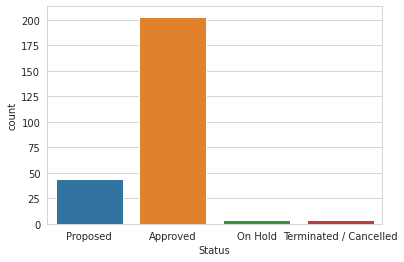

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Status",data=df2)

<AxesSubplot:xlabel='Financing Type', ylabel='Status'>

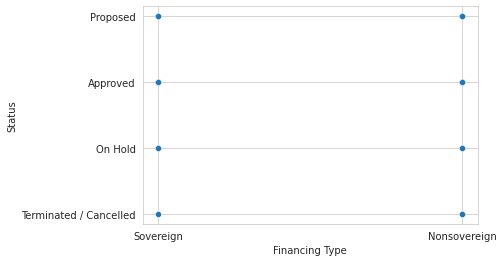

In [ ]:
sns.scatterplot(data=df2,x="Financing Type",y="Status")

<AxesSubplot:xlabel='member', ylabel='sector'>

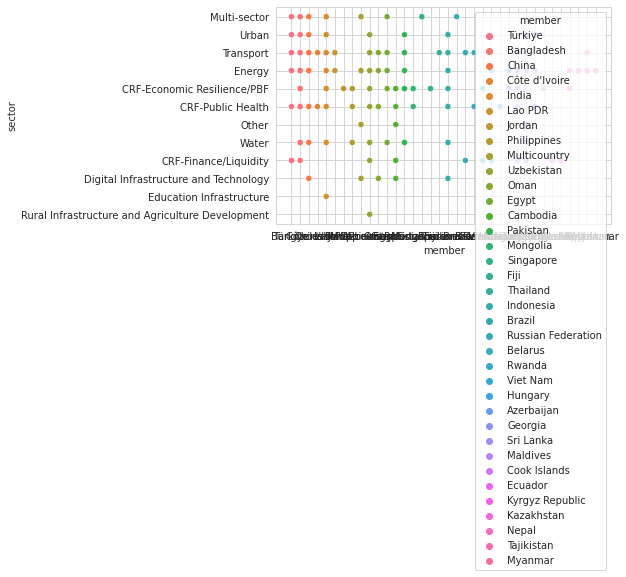

In [ ]:
sns.scatterplot(data=df2,x="member",y="sector",hue="member")

<AxesSubplot:xlabel='Financing Type', ylabel='Count'>

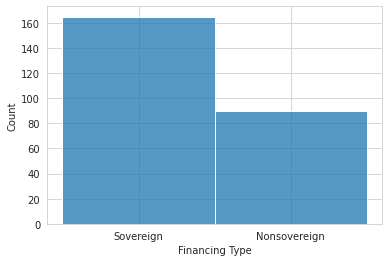

In [ ]:
sns.histplot(x="Financing Type",data=df2)

**Analysis** : 1.Most of the projects are approved
               2.All the members are equally distributed in sectors
               3.Count of Sovereign is high

*Finish....*

**3.Data from world bank projects**

In [ ]:
df3=pd.read_csv("/content/dataset3.csv")
df3.head()

,Project Title,Unnamed: 1,Country,Approval Date
0,Technology for Youth and Jobs Additional Finan...,NaN,West Bank and Gaza,10-Mar-23
1,Cabo Verde Resilient Tourism and Blue Economy ...,NaN,Republic of Cabo Verde,10-Mar-23
2,Improving public financial management for the ...,NaN,Republic of Serbia,9-Mar-23
3,Zambia Education Enhancement Project Second Ad...,NaN,Republic of Zambia,9-Mar-23
4,First Serbia Green Transition Programmatic Dev...,NaN,Republic of Serbia,9-Mar-23


In [ ]:
df3.rename(columns={'Project Title':'Project'},inplace=True)
df3=df3.drop(['Unnamed: 1'],axis=1)
df3.head()

,Project,Country,Approval Date
0,Technology for Youth and Jobs Additional Finan...,West Bank and Gaza,10-Mar-23
1,Cabo Verde Resilient Tourism and Blue Economy ...,Republic of Cabo Verde,10-Mar-23
2,Improving public financial management for the ...,Republic of Serbia,9-Mar-23
3,Zambia Education Enhancement Project Second Ad...,Republic of Zambia,9-Mar-23
4,First Serbia Green Transition Programmatic Dev...,Republic of Serbia,9-Mar-23


**NLP Operations**

In [ ]:
tokens3 = nlp(''.join(str(df3.Project.tolist())))
tokens3

['Technology for Youth and Jobs Additional Financing', 'Cabo Verde Resilient Tourism and Blue Economy Development AF', 'Improving public financial management for the green transition', 'Zambia Education Enhancement Project Second Additional Financing', 'First Serbia Green Transition Programmatic Development Policy Loan', 'West Bank and Gaza Resilient Municipal Services Project']

In [ ]:
for ent in tokens3.ents:
  print(ent.text, "|", ent.label_)

Jobs Additional Financing' | ORG
Blue Economy Development AF' | ORG
West Bank | GPE
Gaza Resilient Municipal Services Project | ORG


In [ ]:
from spacy import displacy
displacy.render(tokens3, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[\'Technology for Youth and \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Jobs Additional Financing\'\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n, \'Cabo Verde Resilient Tourism and \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Blue Economy Development AF\'\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n, \'Improving public financial management for the green transition\', \'Zambia Education Enhancement Project Second Additional Financing\', \'First Serbia Green Transition Programmatic Development Policy Loan\', \'\n<

**Visualization**

<AxesSubplot:xlabel='Country', ylabel='Approval Date'>

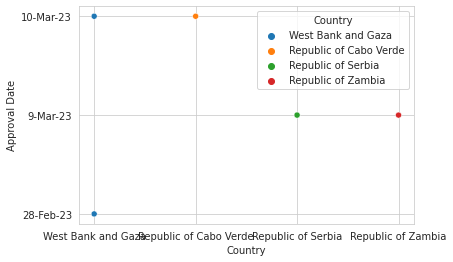

In [ ]:
sns.scatterplot(data=df3,x="Country",y="Approval Date",hue="Country")

<AxesSubplot:xlabel='Approval Date', ylabel='count'>

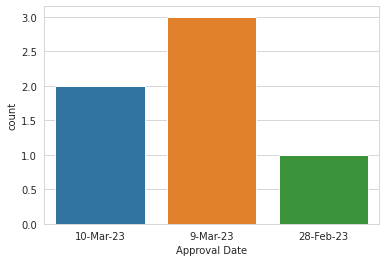

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Approval Date",data=df3)

<AxesSubplot:>

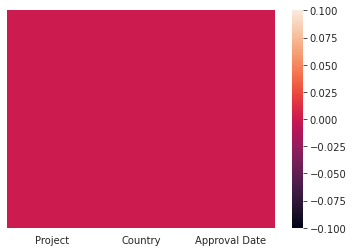

In [ ]:
sns.heatmap(df3.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Country', ylabel='Count'>

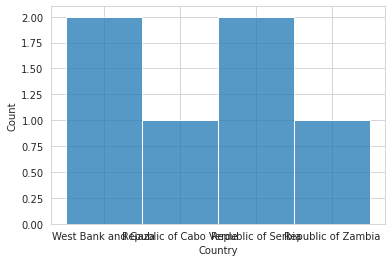

In [ ]:
sns.histplot(x="Country",data=df3)

**Analysis : By observing above graphs we can conclude that West bank and Republic of serbia has highest Approved projects**

*Finish....*

**4.Data from Florida bid Avdertisements**

In [ ]:
df4=pd.read_csv("/content/dataset4.csv")
df4.head()

,Topic,Unnamed: 1,Topic 2,First Post Date,Expiry Date
0,Wakulla County - Professional Engineering Serv...,NaN,Wakulla County has issued the following Reques...,3/9/2023,4/11/2023
1,Okaloosa County - Construction Services for El...,NaN,NOTICE TO RESPONDENTSITB GM 27-23 Notice is ...,3/9/2023,3/29/2023
2,City of Panama City - SRF PS44 Improvements [I...,NaN,SRF PS44 Improvements [ITB PC23-028],3/9/2023,4/12/2023
3,City of Melbourne - Driving Range Netting and ...,NaN,Driving Range Netting and Poles - Harbor City ...,2/27/2023,3/28/2023
4,Bay County - Health Department Roof Restoratio...,NaN,"BOARD OF COUNTY COMMISSIONERS BAY COUNTY, FL...",2/17/2023,3/23/2023


In [ ]:
df4=df4.drop(['Unnamed: 1'],axis=1)
df4.head()

,Topic,Topic 2,First Post Date,Expiry Date
0,Wakulla County - Professional Engineering Serv...,Wakulla County has issued the following Reques...,3/9/2023,4/11/2023
1,Okaloosa County - Construction Services for El...,NOTICE TO RESPONDENTSITB GM 27-23 Notice is ...,3/9/2023,3/29/2023
2,City of Panama City - SRF PS44 Improvements [I...,SRF PS44 Improvements [ITB PC23-028],3/9/2023,4/12/2023
3,City of Melbourne - Driving Range Netting and ...,Driving Range Netting and Poles - Harbor City ...,2/27/2023,3/28/2023
4,Bay County - Health Department Roof Restoratio...,"BOARD OF COUNTY COMMISSIONERS BAY COUNTY, FL...",2/17/2023,3/23/2023


**NLP Operatons**

In [ ]:
tokens4 = nlp(''.join(str(df4.Topic.tolist())))
tokens4

['Wakulla County - Professional Engineering Services Elevated Aluminum Platforms for Lift Stations 2, 7, and 11 [RFQ 2023-13]', 'Okaloosa County - Construction Services for Elevation of a Home Using FEMA Flood Mitigation Grant Funding FEMA 4564-DR-FL [ITB GM 27-23]', 'City of Panama City - SRF PS44 Improvements [ITB PC23-028]', 'City of Melbourne - Driving Range Netting and Poles - Harbor City Golf Course - FEMA [ITB Number: B23007A-0-2023/DB]', 'Bay County - Health Department Roof Restoration [ITB 23-20]', 'Charlotte County - Hurricane Ian Permanent Repairs for Mid County - Group 3 [ITB 23-307]', 'Charlotte County - Hurricane Ian Repairs - Oyster Creek Bridge [ITB 23-350]', 'City of Panama City - Professional Services For Harrison Ave Reconstruction Phase II [RFQ NO: PC23-031]', 'Wakulla County - Wakulla Gardens Phase IV Construction [ITB 2023-10]', 'Wakulla County - Professional Engineering Services Elevated Aluminum Platforms for Lift Stations 12, 28 and 30 [RFQ 2023-11]', 'Okaloosa

In [ ]:
for ent in tokens4.ents:
  print(ent.text, "|", ent.label_)

7 | DATE
11 | CARDINAL
RFQ | ORG
Okaloosa County - Construction Services for Elevation | GPE
Home Using FEMA Flood Mitigation Grant Funding | ORG
4564-DR-FL | DATE
ITB | ORG
GM | ORG
27-23 | CARDINAL
'City | GPE
Panama City - SRF | GPE
ITB | ORG
028 | CARDINAL
Poles | NORP
ITB | ORG
Bay County - | GPE
23-20 | CARDINAL
Charlotte County - | GPE
Mid County - Group | GPE
3 | CARDINAL
ITB | ORG
23 | CARDINAL
Charlotte County - | GPE
23-350 | PERCENT
'City | GPE
Wakulla County - Wakulla Gardens Phase IV Construction | GPE
2023-10 | CARDINAL
'Wakulla County - Professional Engineering Services Elevated Aluminum Platforms | GPE
12 | CARDINAL
28 | DATE
30 | CARDINAL
RFQ | ORG
Okaloosa County - Electric Motor | GPE
Pump and Rotating Equipment Repair/Service/Replacement | ORG
the Water and Sewer Department | ORG
ITB | ORG
29 | CARDINAL
Okaloosa County - Okaloosa County Offshore Artificial Reef Construction | GPE
Deepwater Large and Small | ORG
28-23 | CARDINAL
Bay County - Magnolia | GPE
Multiuse 

In [ ]:
from spacy import displacy
displacy.render(tokens4, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[\'Wakulla County - Professional Engineering Services Elevated Aluminum Platforms for Lift Stations 2, \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    7\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, and \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    11\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n [\n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    RFQ\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; borde

**Analysis : Above data gives information of florida bid advertisments with start date and expiry date**

*Finish....*

**5.Data from Opentender Portal**

In [ ]:
df5=pd.read_csv("/content/dataset5.csv")
df5=df5.drop(['Unnamed: 2'],axis=1)
df5.head()

,Country,Nr of Tendors
0,Austria,"81,284"
1,Belgium,"64,112"
2,Bulgaria,"119,165"
3,Croatia,"141,847"
4,Cyprus,"6,069"


In [ ]:
df.info

<bound method DataFrame.info of                                        Project Title  Unnamed: 1  \
0  Technology for Youth and Jobs Additional Finan...         NaN   
1  Cabo Verde Resilient Tourism and Blue Economy ...         NaN   
2  Improving public financial management for the ...         NaN   
3  Zambia Education Enhancement Project Second Ad...         NaN   
4  First Serbia Green Transition Programmatic Dev...         NaN   
5  West Bank and Gaza Resilient Municipal Service...         NaN   

                  Country Approval Date  
0      West Bank and Gaza     10-Mar-23  
1  Republic of Cabo Verde     10-Mar-23  
2      Republic of Serbia      9-Mar-23  
3      Republic of Zambia      9-Mar-23  
4      Republic of Serbia      9-Mar-23  
5      West Bank and Gaza     28-Feb-23  >

In [ ]:
df['Country']

0        West Bank and Gaza
1    Republic of Cabo Verde
2        Republic of Serbia
3        Republic of Zambia
4        Republic of Serbia
5        West Bank and Gaza
Name: Country, dtype: object

**Visualization**

<AxesSubplot:xlabel='Country', ylabel='Nr of Tendors'>

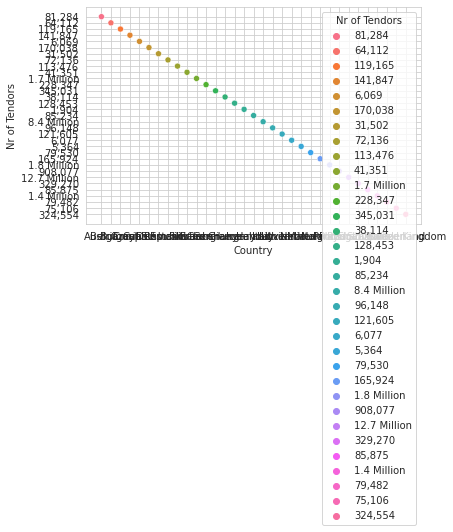

In [ ]:
sns.scatterplot(data=df5,x="Country",y="Nr of Tendors",hue="Nr of Tendors")

**Above Visualization shows the tendor count of different countries**

*Finish....*

**Bonus question: Find data sources for road projects and tenders in the state of California.**

**Following are the data sources :-**

1. https://www.bidnet.com/closed-government-contracts/california/construction/road---highway-materials-Bids

2. https://highways.dot.gov/federal-lands/projects/ca

3. https://www.bidnetdirect.com/california

4. https://www.findrfp.com/State-RFP-Bid/Government-RFPS-bids-California-CA.aspx

5. https://www.governmentbids.com/california-government-bids.jsa

6. https://www.tendernews.com/tenders/latest-tender/california.html

7. https://www.globaltenders.com/latest-tenders?maj_org%5B%5D=US03986